compare 'label_h'and 'label_k' and 'predicted_label' columns to 'label'. Create confusion matrices for all.

In [1]:
# libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

import sys
sys.path.append("../scripts")
import functions as f

In [2]:
# import fully labelled data
reddit = pd.read_csv(
    "/Users/seshat/Documents/GitHub/labor_sentiment_analysis/data/master/reddit_labelled-sample.csv"
)

In [3]:
# convert clusters to categories
h_mapping = {0: "negative", 1: "neutral", 2: "positive"}

k_mapping = {0: "negative", 1: "neutral", 2: "positive"}

In [4]:
# map to df
reddit["label_h"] = reddit["label_h"].map(h_mapping)
reddit["label_k"] = reddit["label_k"].map(k_mapping)

In [5]:
# labels as factors
reddit = f.reddit_dtypes(reddit)

print(reddit.dtypes)

subreddit    category
post_id        object
text           object
score           int64
year         category
month        category
day          category
label_h      category
label_k      category
label        category
label_rf     category
dtype: object


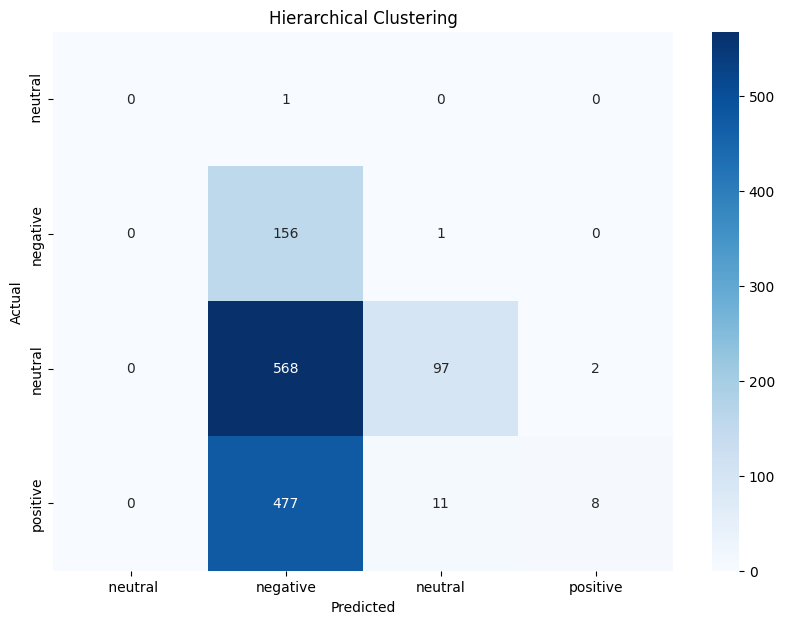

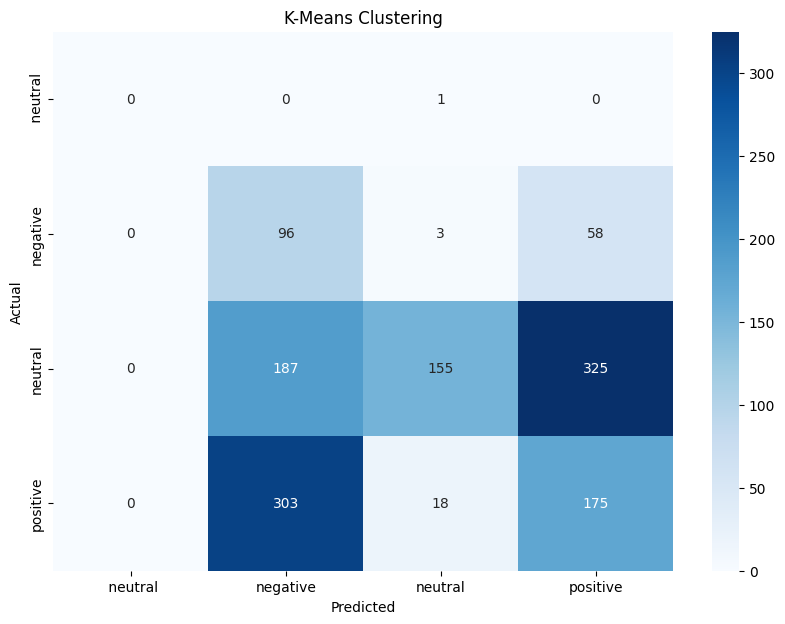

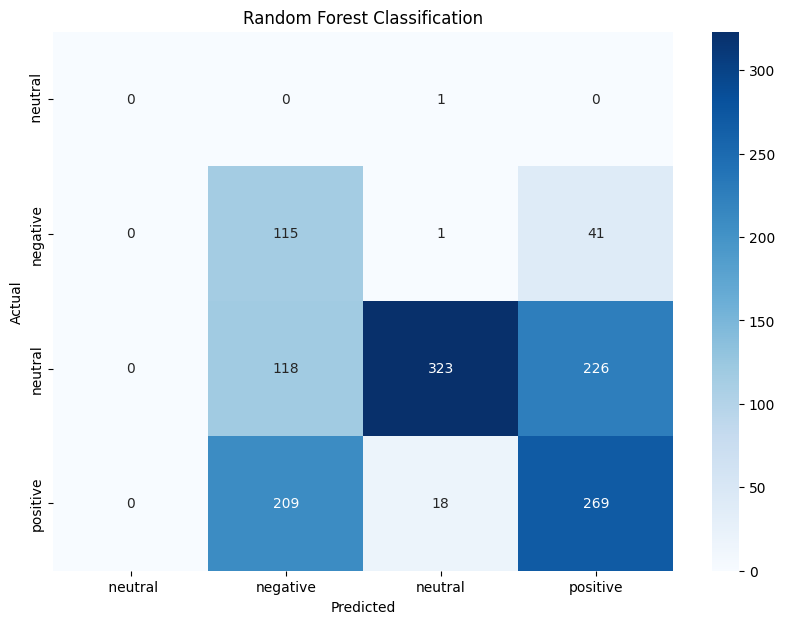

In [6]:
reddit_clean = reddit.dropna(subset=["label"])
categories = reddit_clean["label"].cat.categories

# 'label_h' to 'label'
cm_label_h = confusion_matrix(
    reddit_clean["label"], reddit_clean["label_h"], labels=categories
)
f.plot_confusion_matrix(cm_label_h, categories, "Hierarchical Clustering")

#  'label_k' to 'label'
cm_label_k = confusion_matrix(
    reddit_clean["label"], reddit_clean["label_k"], labels=categories
)
f.plot_confusion_matrix(cm_label_k, categories, "K-Means Clustering")

# Compare 'predicted_label' to 'label'
cm_predicted_label = confusion_matrix(
    reddit_clean["label"], reddit_clean["label_rf"], labels=categories
)
f.plot_confusion_matrix(
    cm_predicted_label, categories, "Random Forest Classification"
)

Discuss.